# WELCOME TO THE YOUTUBE SCRAPER TUTORIAL

In [37]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen, Request
from selenium import webdriver
import pandas as pd
from IPython.display import IFrame, YouTubeVideo
import os

In [10]:
! jt -t onedork

In [19]:
def youtube_scraper(inp):
    
    Search = '+'.join(inp.split())
    
    driver = webdriver.Chrome(executable_path=r'C:\Users\jpravijo\Desktop\Anaconda\chromedriver_win32 (1)\chromedriver.exe')
    driver.get('https://www.youtube.com/results?search_query='+Search)
    html = driver.page_source
    soup = BeautifulSoup(html)
    search = soup.find('body', dir='ltr')
    first_content = soup.find('div', id='content')
        
    link,name,channel=[],[],[]
    
    for i,second_content in enumerate (first_content.find_all('div', class_='text-wrapper style-scope ytd-video-renderer')):
        try:

            third_content=second_content.find('h3', class_='title-and-badge style-scope ytd-video-renderer')

            # TO get the link of the song
            link.append(('https://www.youtube.com'+(third_content.a)['href']).strip())


            # To get the name of the song
            k=third_content.a.text.strip()
            name.append(k)

            # To get the channel details of the songs
            channel.append(second_content.find('div', class_='hidden style-scope paper-tooltip').text.strip())
            
            if i>10:
                    break

        except:
            pass
    dic={'Name of the Songs': name, 'Channel': channel, 'Links':link}   
    print ('\n')
    print ('\033[1m' + 'These are the top 5 searches from youtube for your search'.center(50))
    driver.close()
    return dic

In [34]:
inp=input('enter the songs to play from youtube : ')
df= pd.DataFrame(youtube_scraper(inp))
df.head()

enter the songs to play from youtube : dusk to dawn


These are the top 5 searches from youtube for your search


,Name of the Songs,Channel,Links
0,ZAYN - Dusk Till Dawn ft. Sia (Official Music ...,zayn,https://www.youtube.com/watch?v=tt2k8PGm-TI
1,Dusk Till Dawn - ZAYN ft. Sia (Lyrics),DopeLyrics,https://www.youtube.com/watch?v=IgGylfWRI3I
2,ZAYN & Sia - Dusk Till Dawn (Lyrics),7clouds,https://www.youtube.com/watch?v=p-eS-_olx9M
3,ZAYN - Dusk Till Dawn (Lyrics) ft. Sia,Jessie's Lounge,https://www.youtube.com/watch?v=X930_IyhGfo
4,Dusk to Dawn,Emancipator - Topic,https://www.youtube.com/watch?v=yuocbNdT8SM


## To save the dataframe into HDF Format and CSV format

In [35]:
hdf=pd.HDFStore(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.h5');
hdf.put(inp,df,format='table', data_columns=True);
df.to_csv(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.csv',mode='a')

C:\Users\jpravijo\Anaconda3\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'dusk to dawn'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\jpravijo\Anaconda3\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'Name of the Songs'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\jpravijo\Anaconda3\lib\site-packages\tables\attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'Name of the Songs_kind'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``g

## Choose the Scraped data to play the songs

please select the songs by choosing the indexes (e.g) 0,1,2,3,4
0


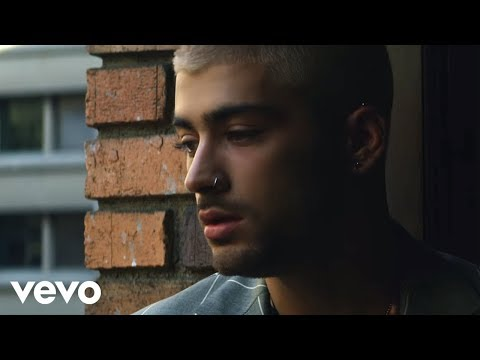

In [36]:
print('\033[1m'+"please select the songs by choosing the indexes (e.g) 0,1,2,3,4")
song_input=int(input())
YouTubeVideo(df.loc[song_input, 'Links'].split('=')[1], width=800, height=600)

## To Open the CSV which contains the Dataframe

In [47]:
os.startfile(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.csv')

## To Open the HDF which contains the Dataframe

In [33]:
hdf=pd.HDFStore(r'C:\Users\jpravijo\Desktop\Anaconda\youtube.h5')
hdf.keys()

['/dusk to dawn',
 '/dusk to dawn song',
 '/martin garrix ',
 '/martin garrix top 5 songs',
 '/martin garrix top songs',
 '/matin garrix animals songs',
 '/rowdy baby songs',
 '/sia cheap trills']

In [23]:
hdf.get('/matin garrix animals songs')

,Name of the Songs,Channel,Links
0,Martin Garrix - Animals (Official Video),Spinnin' Records,https://www.youtube.com/watch?v=gCYcHz2k5x0
1,Martin Garrix - Animals (Original Mix),Spinnin' Records,https://www.youtube.com/watch?v=DuFUtL8zUAk
2,Martin Garrix - Animals (Bass Boosted),BASS BOOSTED SONGS,https://www.youtube.com/watch?v=eIpLAwON_R4
3,Martin Garrix ANIMALS LIVE TOMORROWLAND 2016,G Ru,https://www.youtube.com/watch?v=NcK8Zyzg5eA


In [ ]:

            try:
                view_content=third_content.find('div',class_='yt-lockup-meta').text
                if 'watching' in view_content: 
                    views.append(view_content)
                    months.append('live')
                else:
                    y=view_content.split('g')[0] 
                    l=view_content.split('g')[1]
                    l=l.split('o')[1] 
                    l=l.split(' ')[0] 
                    views.append(l)
                    months.append(y +'go')
            except:
                views.append('Not Found')

In [ ]:
driver=webdriver.Chrome(executable_path=r'C:\Users\jpravijo\Desktop\Anaconda\chromedriver_win32 (1)\chromedriver.exe')
driver.get('https://www.youtube.com/results?search_query=vaathi+coming')
html = driver.page_source
soup = BeautifulSoup(html)

In [97]:
search = soup.find('body', dir='ltr')
first_content = soup.find('div', id='content')

In [98]:
print(first_content.prettify())

<div class="style-scope ytd-app" id="content">
 <div class="style-scope ytd-app" id="masthead-container">
  <ytd-masthead class="" id="masthead" mini-guide-visible="" role="banner" slot="masthead">
   <!--css-build:shady-->
   <iron-media-query class="style-scope ytd-masthead" query="max-width: 656px" style="display: none;">
   </iron-media-query>
   <div class="style-scope ytd-masthead" id="ticker">
   </div>
   <div class="style-scope ytd-masthead" id="interstitial">
   </div>
   <div class="style-scope ytd-masthead" id="container">
    <div class="style-scope ytd-masthead" id="start">
     <yt-icon-button class="style-scope ytd-masthead" id="back-button">
      <!--css-build:shady-->
      <button aria-label="Back" class="style-scope yt-icon-button" id="button">
       <yt-icon class="style-scope ytd-masthead" disable-upgrade="" icon="yt-icons:arrow-back">
       </yt-icon>
      </button>
     </yt-icon-button>
     <paper-tooltip class="style-scope ytd-masthead" disable-upgrade=""

In [117]:
second_content = first_content.find('div', class_='text-wrapper style-scope ytd-video-renderer')
second_content

<div class="text-wrapper style-scope ytd-video-renderer">
<div class="style-scope ytd-video-renderer" id="meta">
<div class="style-scope ytd-video-renderer" id="title-wrapper">
<h3 class="title-and-badge style-scope ytd-video-renderer">
<ytd-badge-supported-renderer class="style-scope ytd-video-renderer" disable-upgrade="" hidden="">
</ytd-badge-supported-renderer>
<a aria-label="Cobra - Thumbi Thullal Lyric | Chiyaan Vikram | AR Rahman | Ajay Gnanamuthu | 7 Screen Studio by Sony Music South 4 days ago 4 minutes, 54 seconds 4,021,047 views" class="yt-simple-endpoint style-scope ytd-video-renderer" href="/watch?v=Dj6DPX53Vfk" id="video-title" title="Cobra - Thumbi Thullal Lyric | Chiyaan Vikram | AR Rahman | Ajay Gnanamuthu | 7 Screen Studio">
<yt-formatted-string aria-label="Cobra - Thumbi Thullal Lyric | Chiyaan Vikram | AR Rahman | Ajay Gnanamuthu | 7 Screen Studio by Sony Music South 4 days ago 4 minutes, 54 seconds 4,021,047 views" class="style-scope ytd-video-renderer">Cobra - Thu

In [128]:
third=second_content.find('h3', class_='title-and-badge style-scope ytd-video-renderer')

In [158]:
second_content.find('div', class_='hidden style-scope paper-tooltip').text.strip()

'Sony Music South'